# Project


Colorectal Liver Metastases Recurrence Prediction from Clinical and CT Image Data

# Preliminaries

In [1]:
import torch
import torch.nn as nn
from torchsummary import summary
import torchvision
import os
import gc
from tqdm import tqdm
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import glob
import matplotlib.pyplot as plt
from torchvision import models
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device: ", DEVICE)

Device:  cuda


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [90]:
import os
import numpy as np
from sklearn.cluster import KMeans
import cv2
from imutils import build_montages
import matplotlib.image as imgplt


DATA_DIR    = '/content/drive/MyDrive/dataset/'
TRAIN_DIR   = os.path.join(DATA_DIR, "train/0") 
VAL_DIR     = os.path.join(DATA_DIR, "valid/0")

dir = os.path.join(DATA_DIR, "train/1") 

image_path = []
all_images = []
images = os.listdir(dir)

for image_name in images:
    image_path.append(dir+'/' + image_name)
for path in image_path:
    image = imgplt.imread(path)
    image = image.reshape(-1, )
    all_images.append(image)


In [91]:
train_1_array = np.array(all_images)

In [97]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# create a scaler object
scaler = MinMaxScaler()

# fit and transform the data
normalized_data = scaler.fit_transform(train_1_array)

# create a PCA object with n_components
pca = PCA(n_components=2)

# fit and transform the data
pca_data_1 = pca.fit_transform(normalized_data)

In [96]:
clt = KMeans(n_clusters=5)
clt.fit(pca_data_0)
clusters_train_0 = clt.predict(pca_data_0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [98]:
clt = KMeans(n_clusters=5)
clt.fit(pca_data_1)
clusters_train_1 = clt.predict(pca_data_1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


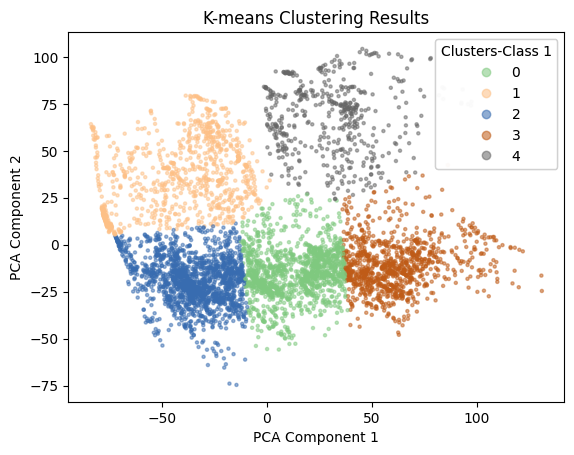

In [105]:
# create a KMeans object with n_clusters

fig, ax = plt.subplots()

#scatter1 = ax.scatter(pca_data_0[:,0], pca_data_0[:,1],s=5, c=clusters_train_0, marker = '*',cmap='Accent',alpha=0.5)
scatter2 = ax.scatter(pca_data_1[:,0], pca_data_1[:,1],s=5, c=clusters_train_1, marker = 'o',cmap='Accent',alpha=0.5)

# add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering Results-c;')
#legend1 = ax.legend(*scatter1.legend_elements(), loc="upper left", title="Clusters-Class 0")
legend2 = ax.legend(*scatter2.legend_elements(), loc="upper right", title="Clusters-Class 1")
#ax.add_artist(legend1)
ax.add_artist(legend2)

# show the plot
plt.show()

In [83]:
train_0 = clt.labels_

In [ ]:
train_1 = clt1.labels_

In [ ]:
valid_0 = clt2.labels_

In [ ]:
valid_1 = clt3.labels_

In [ ]:
np.argwhere(train_0==0).reshape(-1).astype(int)

array([  73,   74,   75, ..., 8212, 8213, 8216])

In [ ]:
a=np.array([1,2,3])

In [ ]:
os.listdir('/content/drive/MyDrive/dataset/train/0')[i for i in a]

SyntaxError: ignored

In [ ]:
train_cluster_0 =np.argwhere(train_0==1).reshape(-1)
train_cluster_1 = np.argwhere(train_1==1).reshape(-1)
os_train_list0 = os.listdir('/content/drive/MyDrive/dataset/train/0')
os_train_list1 = os.listdir('/content/drive/MyDrive/dataset/train/1')
train_cluster_name = []
for i in train_cluster_0:
  a = os_train_list0[int(i)]
  train_cluster_name.append(a)
for i in train_cluster_1:
  a = os_train_list1[int(i)]
  train_cluster_name.append(a)


valid_cluster_0 =np.argwhere(valid_0==1).reshape(-1)
valid_cluster_1 = np.argwhere(valid_1==1).reshape(-1)
os_valid_list0 = os.listdir('/content/drive/MyDrive/dataset/valid/0')
os_valid_list1 = os.listdir('/content/drive/MyDrive/dataset/valid/1')
valid_cluster_name = []
for i in valid_cluster_0:
  a = os_valid_list0[int(i)]
  valid_cluster_name.append(a)
for i in valid_cluster_1:
  a = os_valid_list1[int(i)]
  valid_cluster_name.append(a)


In [ ]:
#SSE = []  # 存放每次结果的误差平方和  
for k in range(7,9):  
    estimator = KMeans(n_clusters=k)  # 构造聚类器  
    estimator.fit(all_images)  
    SSE.append(estimator.inertia_)  

X = range(len(clt.labels_))  
plt.xlabel('k')  
plt.ylabel('SSE')  
plt.plot(X,clt.labels_,'o-')  
plt.show()  

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Classification Dataset

In [67]:
config = {
    "batch_size": 16,
    "lr": 1e-2,
    "epochs": 30
}

In [68]:
DATA_DIR    = '/content/drive/MyDrive/dataset/'
TRAIN_DIR   = os.path.join(DATA_DIR, "train") 
VAL_DIR     = os.path.join(DATA_DIR, "valid")


train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.RandAugment(6),
    # torchvision.transforms.RandomHorizontalFlip(),
    # torchvision.transforms.RandomRotation(10),
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.Grayscale(num_output_channels=1),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.20978874], std=[0.21695834]),
])

valid_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.Grayscale(num_output_channels=1),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.20978874], std=[0.21695834])
])

train_dataset   = torchvision.datasets.ImageFolder(TRAIN_DIR, transform=train_transforms)
valid_dataset   = torchvision.datasets.ImageFolder(VAL_DIR, transform=valid_transforms)

# train_sub_idx = [i for i in range(len(train_dataset)) if train_dataset.imgs[i][0].split('/')[7] in train_cluster_name]
# train_sub_dataset = torch.utils.data.Subset(train_dataset, train_sub_idx)
# valid_sub_idx = [i for i in range(len(valid_dataset)) if valid_dataset.imgs[i][0].split('/')[7] in valid_cluster_name]
# valid_sub_dataset = torch.utils.data.Subset(valid_dataset, valid_sub_idx)

In [69]:
list_name=[]
list_label=[]
for i,j in train_dataset.imgs:
  list_name.append(i)
  list_label.append(j)
from torch.utils.data import WeightedRandomSampler
labels_unique,counts = np.unique(np.array(list_label),return_counts=True)
class_weights = [sum(counts)/c for c in counts]
example_weights = [class_weights[e] for e in list_label ]
sampler1 = WeightedRandomSampler(example_weights,len(list_label))

In [70]:
from torch.utils.data import WeightedRandomSampler
labels_unique,counts = np.unique(np.array(list_label),return_counts=True)
class_weights = [sum(counts)/c for c in counts]
example_weights = [class_weights[e] for e in list_label ]
sampler = WeightedRandomSampler(example_weights,len(list_label))

In [71]:
train_loader = torch.utils.data.DataLoader(
    dataset     = train_dataset, 
    batch_size  = config['batch_size'], 
    #shuffle     = True,
    num_workers = 4, 
    sampler = sampler,
    pin_memory  = True
)

valid_loader = torch.utils.data.DataLoader(
    dataset     = valid_dataset, 
    batch_size  = config['batch_size'],
    shuffle     = False,
    #sampler = sampler,
    num_workers = 2
)

# Model

In [72]:
from collections import OrderedDict

model_name = 'vgg16' #changeable
PRETRAINED = True #changeable

model = None #Don't touch

if model_name == 'vgg16':
    model = torchvision.models.vgg16(pretrained = PRETRAINED).to(DEVICE)
    
    if PRETRAINED:
        for param in model.parameters():
            param.requires_grad = False
            
    layers_vgg16 = nn.Sequential(OrderedDict([
            ('fc1', nn.Linear(25088, 512)),
            ('activation1', nn.ReLU()),
            ('dropout1', nn.Dropout(0.2)),
            ('fc2', nn.Linear(512, 256)),
            ('activation2', nn.ReLU()),
            ('dropout2', nn.Dropout(0.2)),
            ('fc3', nn.Linear(256, 128)),
            ('activation3', nn.ReLU()),
            ('dropout3', nn.Dropout(0.2)),
            ('fc4', nn.Linear(128, 2)),
            ('out', nn.Sigmoid())

        ])).to(DEVICE)
    model.classifier = layers_vgg16

assert(model is not None)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [40]:
# Reference: https://arxiv.org/abs/2201.03545(github: https://github.com/facebookresearch/ConvNeXt) 
import torch.nn as nn

class Block(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.conv1 = nn.Conv2d(dim, dim, kernel_size=7, padding=3, groups=dim)
        self.bn1 = nn.BatchNorm2d(dim)
        self.conv2 = nn.Conv2d(dim, dim*4, kernel_size= 1, stride= 1, padding= 0)
        self.gelu = nn.GELU()
        self.conv3 = nn.Conv2d(4*dim, dim, kernel_size= 1, stride= 1, padding= 0)
    
    def forward(self, x):
        self.input = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.conv2(x)
        x = self.gelu(x)
        x = self.conv3(x)
        return x + self.input
    
class ConvNeXt_L(nn.Module):
    def __init__(self, in_channels= 1, num_class= 1, depths= [3, 3, 27, 3], dims = [96, 192, 384, 768]):
        super().__init__()
        self.downsample_layers = nn.ModuleList()
        self.stage_layers = nn.ModuleList()
        self.cls_layer = nn.Linear(dims[-1], num_class)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.flat = nn.Flatten()
        self.dropout = nn.Dropout(p = 0.1)
        
        # add stem layer
        self.stem_layer = nn.Sequential(
            nn.Conv2d(in_channels, dims[0], kernel_size= 4, stride= 4),
            # use BN rather than LN, which is different from the original model
            nn.BatchNorm2d(dims[0])
        )
        self.downsample_layers.append(self.stem_layer)
        
        # add different down-sample layer 
        for i in range(3):
            downsample_layer = nn.Sequential(
                nn.BatchNorm2d(dims[i]),
                nn.Conv2d(dims[i], dims[i+1], kernel_size= 2, stride= 2)
            )
            self.downsample_layers.append(downsample_layer)
            
        # add model block to stage layer
        for i in range(4):
            stage_layer = nn.Sequential(
                *[Block(dim= dims[i]) for k in range(depths[i])]
            )
            self.stage_layers.append(stage_layer)
        
    def forward(self, x, return_feats=False):
        for i in range(4):
            x = self.downsample_layers[i](x)
            x = self.stage_layers[i](x)
        x = self.avgpool(x)
        x = self.flat(x)
        x = self.dropout(x)
        
        if return_feats:
            return x
        else:
            return self.cls_layer(x)

In [41]:
model = ConvNeXt_L().to(DEVICE)
summary(model, (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 56, 56]           1,632
            Conv2d-2           [-1, 96, 56, 56]           1,632
       BatchNorm2d-3           [-1, 96, 56, 56]             192
       BatchNorm2d-4           [-1, 96, 56, 56]             192
            Conv2d-5           [-1, 96, 56, 56]           4,800
       BatchNorm2d-6           [-1, 96, 56, 56]             192
            Conv2d-7          [-1, 384, 56, 56]          37,248
              GELU-8          [-1, 384, 56, 56]               0
            Conv2d-9           [-1, 96, 56, 56]          36,960
            Block-10           [-1, 96, 56, 56]               0
           Conv2d-11           [-1, 96, 56, 56]           4,800
      BatchNorm2d-12           [-1, 96, 56, 56]             192
           Conv2d-13          [-1, 384, 56, 56]          37,248
             GELU-14          [-1, 384,

In [73]:
cfg = {
    'A' : [64,     'M', 128,      'M', 256, 256,           'M', 512, 512,           'M', 512, 512,           'M'],
    'B' : [64, 64, 'M', 128, 128, 'M', 256, 256,           'M', 512, 512,           'M', 512, 512,           'M'],
    'D' : [64, 64, 'M', 128, 128, 'M', 256, 256, 256,      'M', 512, 512, 512,      'M', 512, 512, 512,      'M'],
    'E' : [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M']
}

class VGG(nn.Module):

    def __init__(self, features, num_class=1):
        super().__init__()
        self.features = features

        self.classifier = nn.Sequential(
            #nn.Linear(25088, 4096),
            nn.Linear(25088,8),
            # nn.Sigmoid(),
            nn.ReLU(),
            nn.Dropout(),
            #nn.Linear(4096, 4096),
            nn.Linear(8,8),
            # nn.Sigmoid(),
            nn.ReLU(),
            nn.Dropout(),
            #nn.Linear(4096, num_class)
            nn.Linear(8, num_class)
        )

    def forward(self, x):
        output = self.features(x)
        output = output.view(output.size()[0], -1)
        output = self.classifier(output)

        return output

def make_layers(cfg, batch_norm=False):
    layers = []

    input_channel = 1
    for l in cfg:
        if l == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            continue

        layers += [nn.Conv2d(input_channel, l, kernel_size=3, padding=1)]

        if batch_norm:
            layers += [nn.BatchNorm2d(l)]

        # layers += [nn.Sigmoid()]
        layers += [nn.ReLU(inplace=True)]
        input_channel = l

    return nn.Sequential(*layers)

model = VGG(make_layers(cfg['B'], batch_norm=True)).to(DEVICE)
summary(model, (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]             640
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
       BatchNorm2d-9        [-1, 128, 112, 112]             256
             ReLU-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]         147,584
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
        MaxPool2d-14          [-1, 128,

# Setup everything for training

In [74]:
criterion = torch.nn.BCEWithLogitsLoss()
#criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(model.parameters())
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,'max',factor=0.5, patience=2)

# Let's train!

In [75]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [76]:
import torch.nn.functional as F
def train(model, dataloader, optimizer, criterion):
    
    model.train()

    batch_bar   = tqdm(total=len(dataloader), dynamic_ncols=True, leave=False, position=0, desc='Train', ncols=5) 

    total_loss  = 0.0
    num_correct = 0

    for i, (images, labels) in enumerate(dataloader):
        
        optimizer.zero_grad()
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        
        outputs = model(images)
        loss    = criterion(outputs, labels.unsqueeze(1).float())

        pred = torch.tensor([1 if x > 0.75 else 0 for x in F.sigmoid(outputs)])
        pred = pred.to(DEVICE)
        num_correct     += int((pred == labels).sum())
        total_loss += float(loss.item())

        batch_bar.set_postfix(
            acc         = "{:.04f}%".format(100 * num_correct / (config['batch_size']*(i + 1))),
            loss        = "{:.04f}".format(float(total_loss / (i + 1))),
            lr          = "{:.04f}".format(float(optimizer.param_groups[0]['lr']))
        )
        
        loss.backward()
        optimizer.step()
      
        batch_bar.update()

    batch_bar.close()

    acc         = 100 * num_correct / (config['batch_size']* len(dataloader))
    total_loss  = float(total_loss / len(dataloader))

    return acc, total_loss

In [77]:
def validate(model, dataloader, criterion):
  
    model.eval()
    batch_bar = tqdm(total=len(dataloader), dynamic_ncols=True, position=0, leave=False, desc='Val', ncols=5)

    total_loss = 0.0
    num_correct = 0.0
    test_results = []
    true_labels = []

    for i, (images, labels) in enumerate(dataloader):

        images, labels = images.to(DEVICE), labels.to(DEVICE)
        
        with torch.inference_mode():
            outputs = model(images)
            loss    = criterion(outputs, labels.unsqueeze(1).float())

        pred = F.sigmoid(outputs)
        pred = torch.tensor([1 if x > 0.75 else 0 for x in pred]).to(DEVICE)
        num_correct     += int((pred == labels).sum())
        total_loss += float(loss.item())


        opts = pred.detach().cpu().numpy().tolist()
        labels = labels.detach().cpu().numpy().tolist()
        test_results.extend(opts)
        true_labels.extend(labels)

        batch_bar.set_postfix(
            acc="{:.04f}%".format(100 * num_correct / (config['batch_size']*(i + 1))),
            loss="{:.04f}".format(float(total_loss / (i + 1))))

        batch_bar.update()
        
    batch_bar.close()


    acc         = 100 * num_correct / (config['batch_size']* len(dataloader))
    total_loss = float(total_loss / len(dataloader))
    
    return acc, total_loss,test_results, true_labels

In [78]:
gc.collect()
torch.cuda.empty_cache()

# Experiments

In [ ]:
val_acc, val_loss,test_results, true_labels = validate(model, valid_loader, criterion)

In [79]:
best_valacc = 0

for epoch in range(config['epochs']):

    curr_lr = float(optimizer.param_groups[0]['lr'])

    train_acc, train_loss = train(model, train_loader, optimizer, criterion)
    
    print("\nEpoch {}/{}: \nTrain Acc {:.04f}%\t Train Loss {:.04f}\t Learning Rate {:.04f}".format(
        epoch + 1,
        config['epochs'],
        train_acc,
        train_loss,
        curr_lr))
    
    val_acc, val_loss,test_results, true_labels = validate(model, valid_loader, criterion)
    
    print("Val Acc {:.04f}%\t Val Loss {:.04f}".format(val_acc, val_loss))
    scheduler.step(val_acc)


    # if val_acc >= best_valacc:
    #   #path = os.path.join(root, model_directory, 'checkpoint' + '.pth')
    #   print("Saving model")
    #   torch.save({'model_state_dict':model.state_dict(),
    #               'optimizer_state_dict':optimizer.state_dict(),
    #               #'scheduler_state_dict':scheduler.state_dict(),
    #               'val_acc': val_acc, 
    #               'epoch': epoch}, '/content/drive/MyDrive/mlproj_base1.pth')
    #   best_valacc = val_acc


Epoch 1/30: 
Train Acc 50.3289%	 Train Loss 0.6956	 Learning Rate 0.1000


Val Acc 61.8976%	 Val Loss 0.6973



Epoch 2/30: 
Train Acc 49.7880%	 Train Loss 0.6937	 Learning Rate 0.1000


Val Acc 61.8976%	 Val Loss 0.6806



Epoch 3/30: 
Train Acc 50.3509%	 Train Loss 0.6934	 Learning Rate 0.1000


Val Acc 61.8976%	 Val Loss 0.6809



Epoch 4/30: 
Train Acc 50.4167%	 Train Loss 0.6938	 Learning Rate 0.1000


Val Acc 61.8976%	 Val Loss 0.6905



Epoch 5/30: 
Train Acc 50.1316%	 Train Loss 0.6932	 Learning Rate 0.0500


Val Acc 61.8976%	 Val Loss 0.6887



Epoch 6/30: 
Train Acc 48.8304%	 Train Loss 0.6932	 Learning Rate 0.0500


Val Acc 61.8976%	 Val Loss 0.6973



Epoch 7/30: 
Train Acc 50.5044%	 Train Loss 0.6934	 Learning Rate 0.0500


Val Acc 61.8976%	 Val Loss 0.6896


Train:  95%|█████████▍| 810/855 [01:07<00:03, 11.54it/s, acc=50.1543%, loss=0.6933, lr=0.0250]

KeyboardInterrupt: ignored

Text(83.22222222222221, 0.5, 'Predicted class')

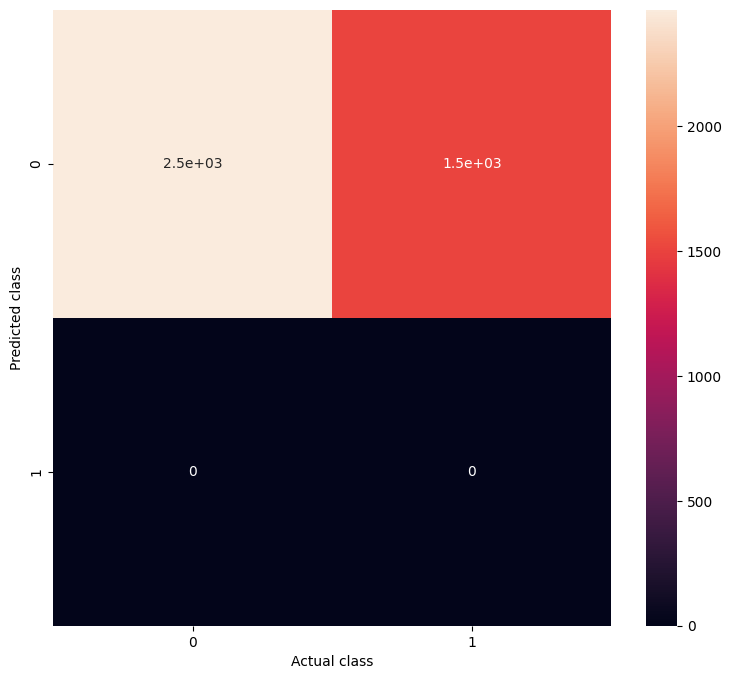

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# test_results, true_labels = test(model, valid_loader, criterion)

cm = confusion_matrix(test_results, true_labels)
plt.figure(figsize=(9, 8))
sns.heatmap(cm, annot=True)
plt.xlabel("Actual class")
plt.ylabel("Predicted class")

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(true_labels, test_results)

# Print F1 score
print("F1 score:", f1)

F1 score: 0.0
